### Import necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


### Data Loading and Cleaning

In [3]:
# Load the data
data = pd.read_csv('housing.csv')
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
# Information about the data (Non-null count and data type)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
# Drop the rows with missing or Nan values
data.dropna(inplace=True)

In [6]:
# Information about the data after dropping Nan values
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


### Data preprocessing

In [7]:
# Split the data into features and target

x = data.drop('median_house_value', axis=1)
y = data['median_house_value']

In [8]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [9]:
# Join the features and target for training and Test data
train_data = x_train.join(y_train)
test_data = x_test.join(y_test)


### Data Visualization

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

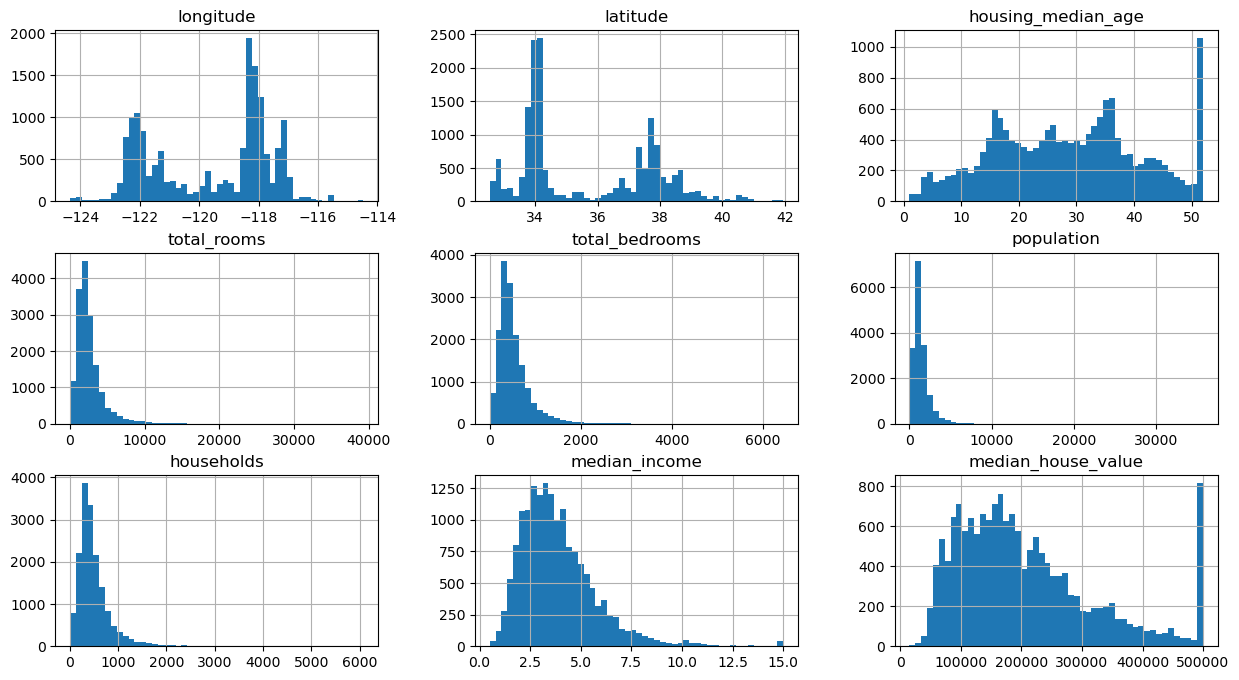

In [10]:
# Plot the histogram of the training data
train_data.hist(bins=50, figsize=(15, 8))

<Axes: >

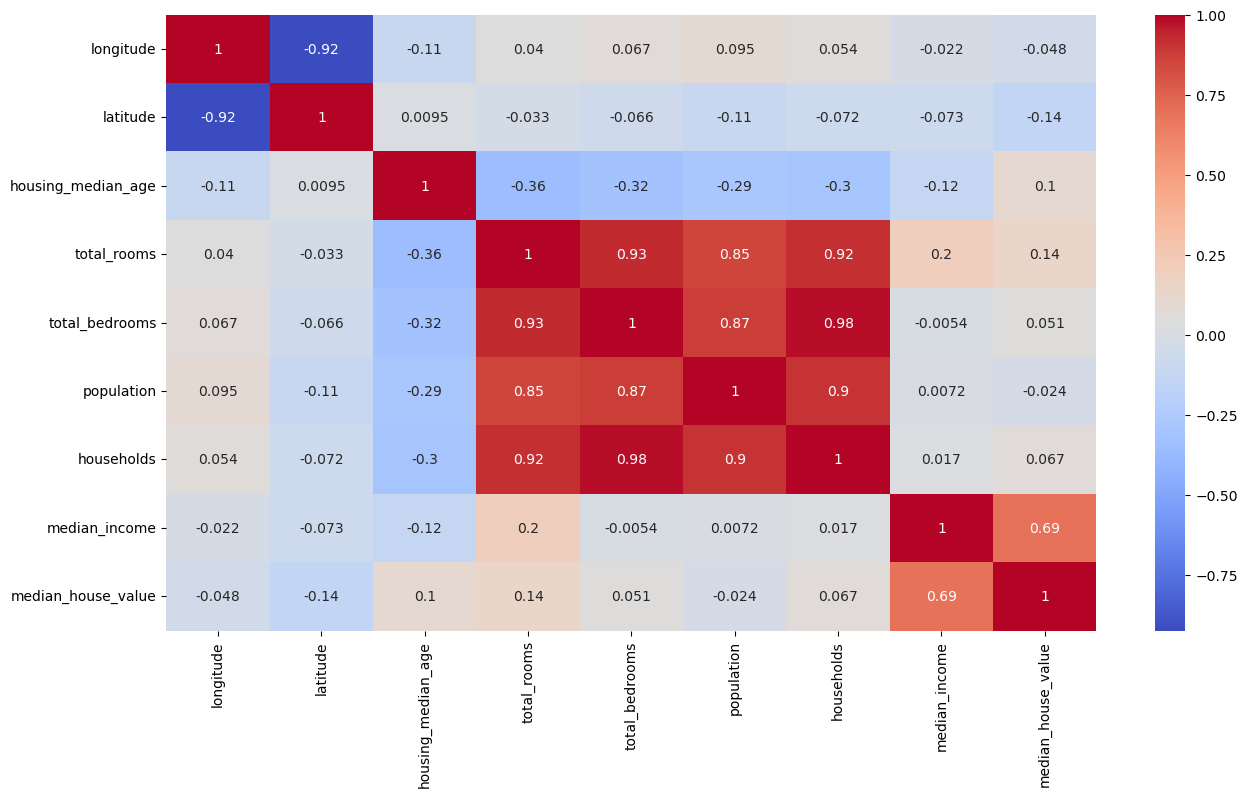

In [11]:
# Plot the heatmap of the correlation matrix of the training data
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap='coolwarm')

In [12]:
# Log transformation of the features which are right skewed

train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

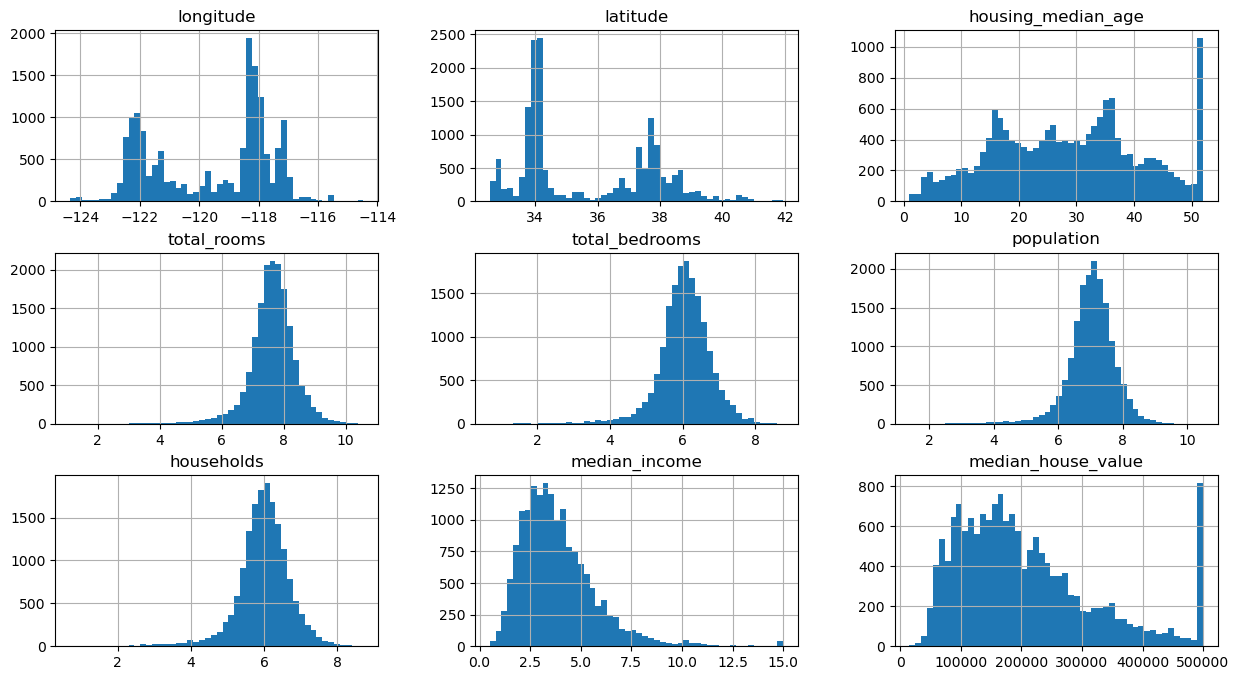

In [13]:
# Plot the histogram of the training data after log transformation
train_data.hist(bins=50, figsize=(15, 8))

In [14]:
# Value counts of the ocean_proximity column in the training data
train_data.ocean_proximity.value_counts()

# One hot encoding of the ocean_proximity column in the training data
dummies_train = pd.get_dummies(train_data.ocean_proximity).astype(int)
train_data = train_data.join(dummies_train).drop('ocean_proximity', axis=1)

In [15]:
# Value counts of the ocean_proximity column in the test data
test_data.ocean_proximity.value_counts()

# One hot encoding of the ocean_proximity column in the test data
dummies_test = pd.get_dummies(test_data.ocean_proximity).astype(int)
test_data = test_data.join(dummies_test).drop('ocean_proximity', axis=1)

<Axes: >

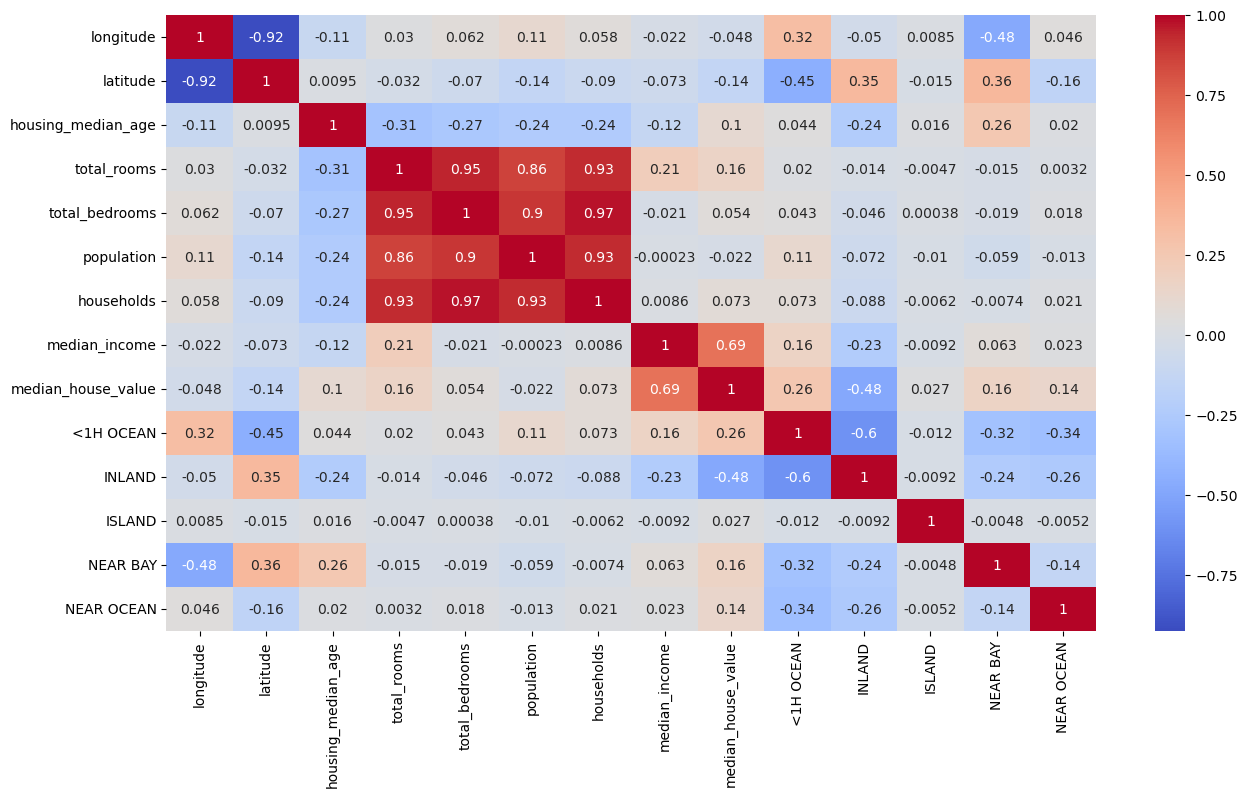

In [16]:
# Plot the heatmap of the correlation matrix of the training data after one hot encoding
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap='coolwarm')

<Axes: xlabel='latitude', ylabel='longitude'>

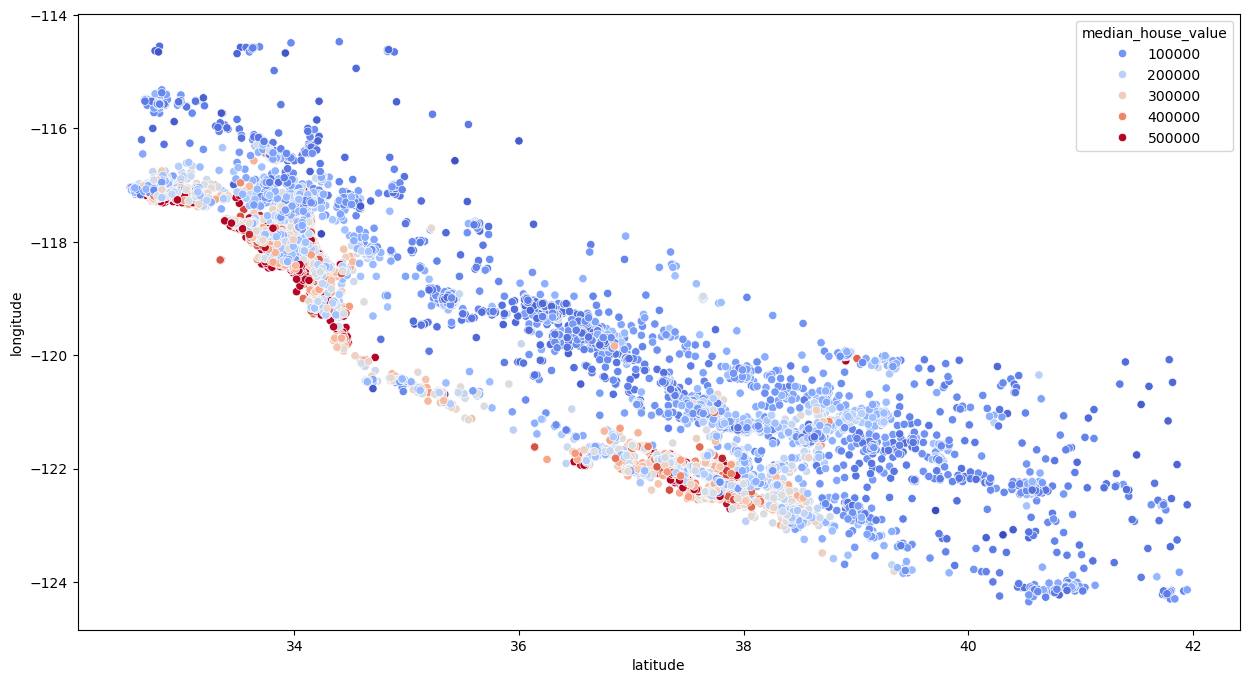

In [17]:
# Plot the scatter plot of latitude and longitude with median_house_value
plt.figure(figsize=(15, 8))
sns.scatterplot(x='latitude', y='longitude', data=train_data, hue='median_house_value', palette='coolwarm')

### Feature Engineering

In [18]:
# New Features 'bedroom_ratio', and 'household_rooms' are created in the training data

train_data["bedroom_ratio"] = train_data["total_bedrooms"]/train_data["total_rooms"]
train_data["household_rooms"] = train_data["total_rooms"]/train_data["households"]

In [19]:
# New Features 'bedroom_ratio', and 'household_rooms' are created for the test data

test_data["bedroom_ratio"] = test_data["total_bedrooms"]/test_data["total_rooms"]
test_data["household_rooms"] = test_data["total_rooms"]/test_data["households"]

<Axes: >

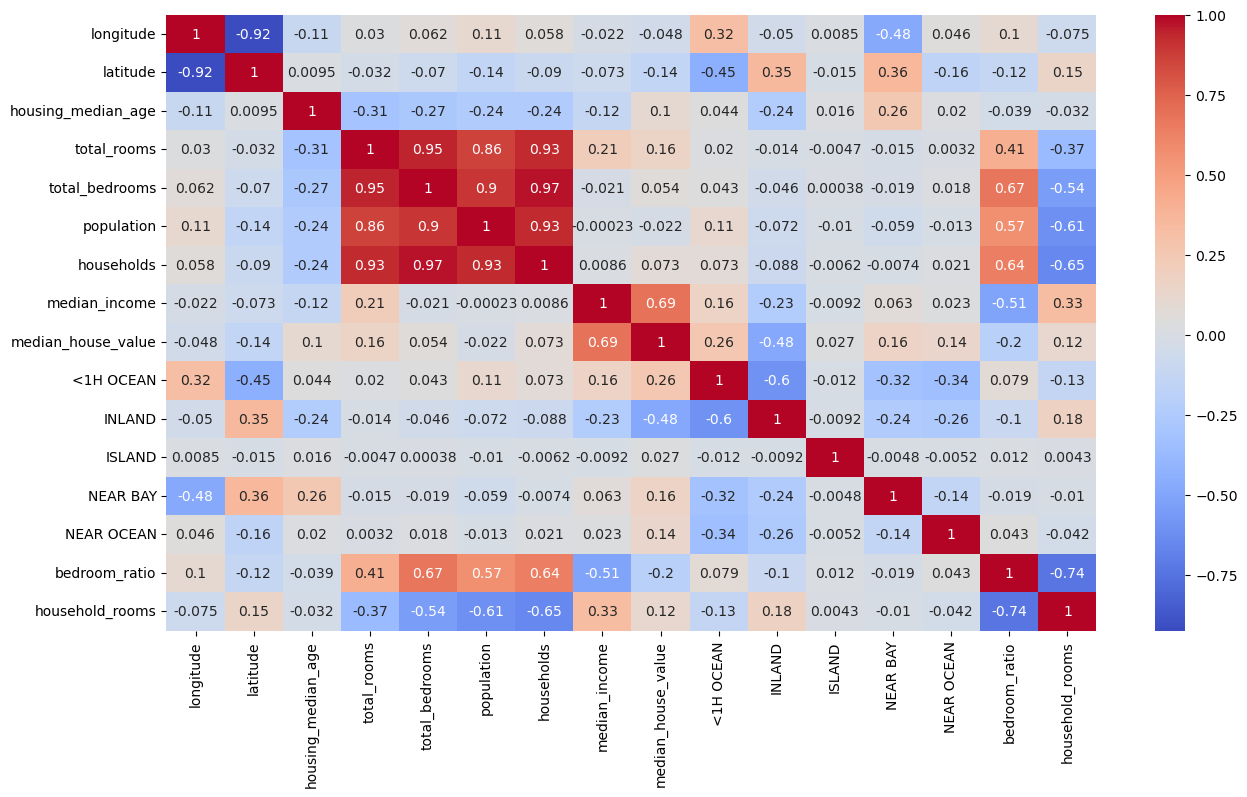

In [20]:
# Heatmap of the correlation matrix with new features in the training data
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap='coolwarm')

<Axes: >

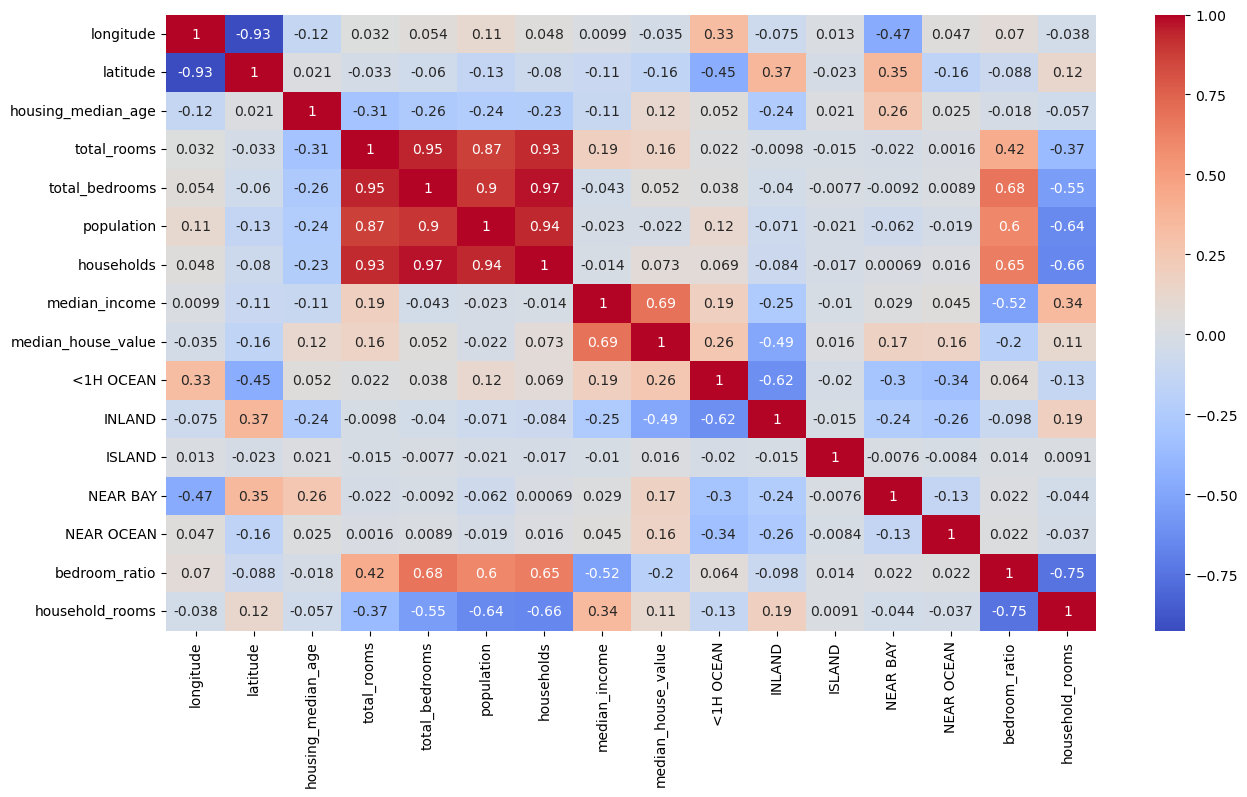

In [21]:
# Heatmap of the correlation matrix with new features in the test data
plt.figure(figsize=(15, 8))
sns.heatmap(test_data.corr(numeric_only=True), annot=True, cmap='coolwarm')

### Saving the Training and Test data as a csv file

In [22]:
train_data.to_csv('train_data.csv', index=False)
test_data.to_csv('test_data.csv', index=False)
x_train.to_csv('x_train.csv', index=False)
x_test.to_csv('x_test.csv', index=False)    
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)